Feature Engineering: En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.

In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import os

In [2]:
def analyze_sentiment(review):
    if pd.isnull(review):
        return 1  # Valor 1 para reseñas sin contenido
    else:
        # Utiliza TextBlob para análisis de sentimiento
        blob = TextBlob(review)
        polarity = blob.sentiment.polarity

        # Asigna valor según la polaridad
        if polarity < 0:
            return 0  # Valor 0 para reseñas negativas
        elif polarity == 0:
            return 1  # Valor 1 para reseñas neutrales
        else:
            return 2  # Valor 2 para reseñas positivas


In [5]:
#Abro el archivo para aplicar analisis de sentimiento
ruta_archivo = r"M:\Documentos\Mai\Henry\Cursado\P.I. 1\Bases de datos\Archivos Originales CSV\user_reviews.parquet"
df_reviews = pd.read_parquet(ruta_archivo)


In [6]:
#Aplicar analisis sobre columna "reviews"
df_reviews['sentiment_analysis'] = df_reviews['review'].apply(analyze_sentiment)

In [8]:
df_reviews.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,0


In [9]:
#Exportar a CSV con nueva columna de analisis de sentimientos
df_reviews.to_csv( "user_reviews_sentiment_analysis_TextBlob.csv", sep=';', index=False, encoding='utf-8')
# df_reviews.to_parquet('user_reviews_sentiment_analysis.parquet', index=False)

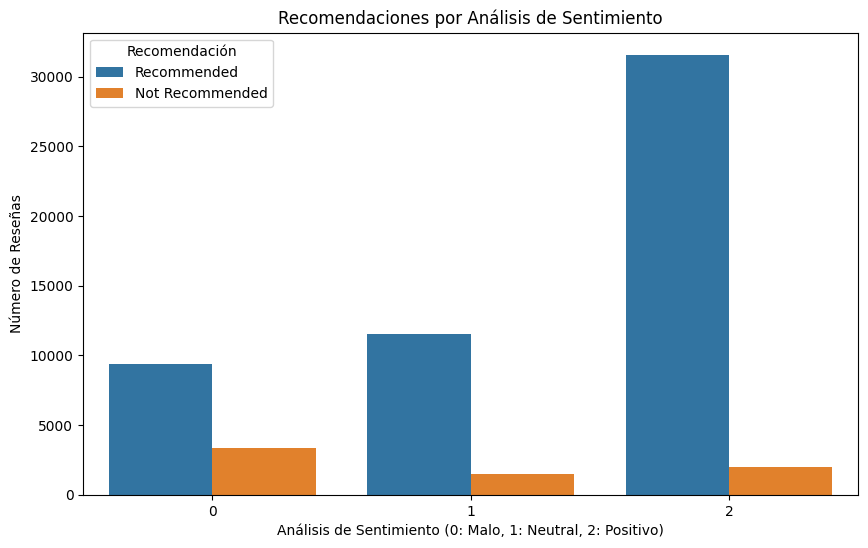

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_reviews es tu DataFrame
df_reviews['recommend'] = df_reviews['recommend'].map({True: 'Recommended', False: 'Not Recommended'})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='sentiment_analysis', hue='recommend')
plt.title('Recomendaciones por Análisis de Sentimiento')
plt.xlabel('Análisis de Sentimiento (0: Malo, 1: Neutral, 2: Positivo)')
plt.ylabel('Número de Reseñas')
plt.legend(title='Recomendación')
plt.show()


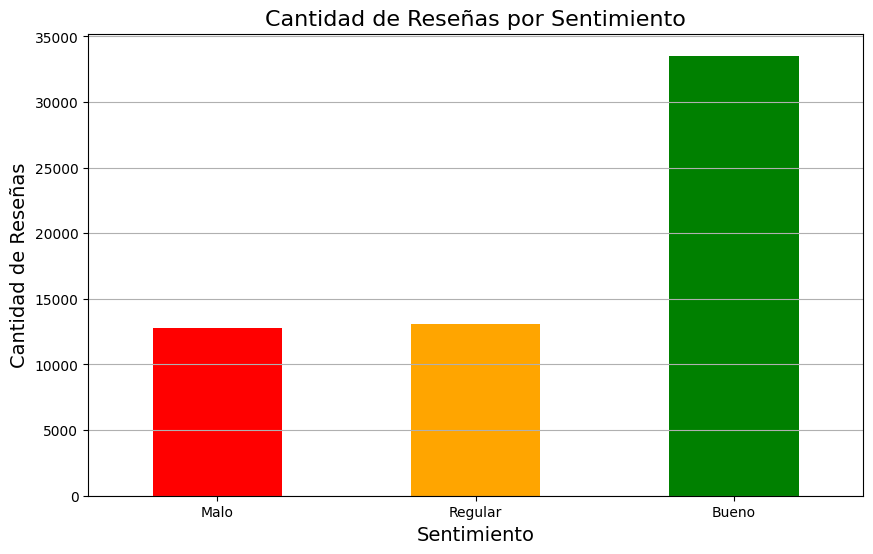

In [11]:
# Contar la cantidad de reseñas por categoría
recuento_sentimientos = df_reviews['sentiment_analysis'].value_counts().sort_index()

# Definir etiquetas para los valores
etiquetas = {0: 'Malo', 1: 'Regular', 2: 'Bueno'}
recuento_sentimientos.index = recuento_sentimientos.index.map(etiquetas)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
recuento_sentimientos.plot(kind='bar', color=['red', 'orange', 'green'])

# Añadir títulos y etiquetas
plt.title('Cantidad de Reseñas por Sentimiento', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Reseñas', fontsize=14)
plt.xticks(rotation=0)  # Mantener las etiquetas horizontales

# Mostrar la gráfica
plt.grid(axis='y')
plt.show()